height


True

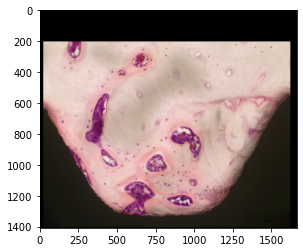

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa 
from random import *

original= cv2.imread('C:\\Users\\tndus\\workspace\\DIP\\project\\opened_image\\18-40-02-02 (SLA).jpg',cv2.IMREAD_COLOR)
x=original.shape[1] #사진의 width = column
y=original.shape[0] #사진의 height = row

mii=min(x,y) 
#maa=max(x,y) 

maa=128*(max(x,y)//128+randrange(2,5))

if min == x:
    mii=128*(mii//128+1)
    a = maa
    b = mii
    print('width')
else:
    mii=128*(mii//128+1)
    a = mii
    b = maa
    print('height')

a = randrange(mii, maa,128)
b = randrange(mii, maa,128)

aug=iaa.PadToFixedSize(width=b, height=a) #random 위치에서 padding을 수행하여 이미지 사이즈로 만들어줌 
pad=aug(image=original)
plt.imshow(pad[...,::-1])
os.mkdir('./aug')
cv2.imwrite('./aug/18-40-02-02 (SLA).jpg',pad)

In [5]:
import json
from collections import OrderedDict

file_data = OrderedDict()
file_data['Translation(Padding)'] = {'paddingBox_height':a,'paddingBox_width':b}

print(json.dumps(file_data,ensure_ascii=False,indent='\t'))

with open('descriptor_.json','w',encoding='utf-8') as make_file:
    json.dump(file_data,make_file,ensure_ascii=False,indent='\t')

{
	"Translation": {
		"paddingBox_height": 1408,
		"paddingBox_width": 1664
	}
}


In [4]:
import os
os.getcwd()

'C:\\Users\\tndus\\workspace\\DIP\\project'

In [ ]:
original.shape 
# 최소 1664 x 1280 되어야 함 